Vamos a crear una red neuronal pra tratar con un conjunto mucho más grande, el datase MNIST de dígitos. Veremos que el tiempo de cómputo se incrementa y que se hace necesario el uso de GPU, el cual hace Keras por nosotros.

# Conjuntos MNIST de dígitos

Son 70.000 imágenes de dígitos manuscritos del 0 al 9. Tamaño es 28x28, en escala de grises. El conjunto se divide en 60.000 imágenes para train y 10.000
para test.
Vamos a crear una red neuronal que será de "ver", pero con ahora, sin usar operadores avanzados, es decir, convolución (CNN Convolutional Neural Nertwork)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical



In [2]:
# 1️⃣ Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# El método shape nos devuelve la forma del conjunto. 60.000 imágenes de 28x28
print("shape: ", X_train.shape)

shape:  (60000, 28, 28)


Vemos que cada pixel es un byte con rang de 0 a 255 en formato entero. Esta escala no es adecuada para una ANN, así que habría que normalizar. Vamos a hacer una normalización en el rango -0.5 a 0.5. Y convertir en reales.

In [4]:
# 2️⃣ Normalización de los datos

X_train = X_train.astype('float32')
X_test = X_test.astype("float32")

X_train /= 255 # Escalar a uun rango entre 0 y 1
X_test /= 255 # Escalar a uun rango entre 0 y 1

X_train-= 0.5 # Desplazar
X_test -=0.5

In [5]:
print("Max value: ", max(X_train[125].reshape(784)))
print("Max value: ", min(X_train[125].reshape(784)))

Max value:  0.5
Max value:  -0.5


In [6]:
# 3️⃣ Dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:
# Mostrar las nuevas formas de los conjuntos
print("Entrenamiento:", X_train.shape)
print("Validación:", X_val.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (48000, 28, 28)
Validación: (12000, 28, 28)
Prueba: (10000, 28, 28)


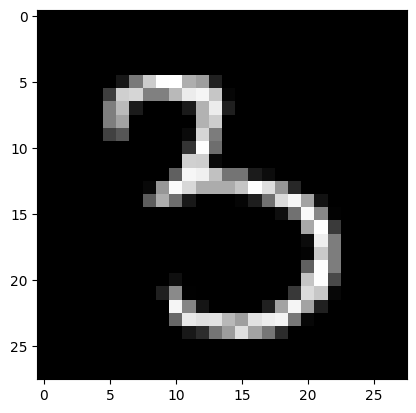

In [8]:
# Veamos una imagen cualquiera, por ejemplo la que tiene el índice 15
image = np.array(X_train[125], dtype='float')
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
print("Label: " , y_train[125])

Label:  3


Ahora preparamos las etiquetas transformándolas a formato *one_hot*

In [10]:
# Convertir etiquetas a One-Hot Encoding
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print("Label: ", y_train[125])

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
# Aplanamos los datos
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [12]:
print("Elemento 125: ", X_train[125])
print("")
print("Min value: ", (X_train[125].reshape(784)))

Elemento 125:  [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        

In [13]:
print("Elemento 125: ", X_train[125])
print("Elemento 125: ", X_train[125].reshape(784))

Elemento 125:  [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.5        

# Preparación del modelo

Problema de clasificación con 10 clases posibles. La capa de salida debe tener 10 neronas. La capa de entrada, como son imágenes de 28x28, tenfrá 784 neuronas.
En la capa oculta no hay fomra de saber a priori el número óptimo ni de capas ni de neuronas. Vamos a probar con una sola capa oculta de 20 neuronas. Como funciones d eactivación vamos a usar sigmoides en la capa intermedia. En la capa de salida vamos a usar softmax (problema de clasificación).

Se podría crear la red con el modelo Sequential, pero vamos a haerlo con el modelo no secuencial, que es uuna API funcional de Keras.

In [14]:
# Estes es el por defecto de clase
# from keras.layers import Input, Dense
# from keras.models import Model

# inputs= Input(shape=(784,)) # Capa de entrda
# output_h= Dense(units=20, activation='sigmoid')(inputs) # Capa oculta conectada con la de entrada
# predictions= Dense(10, activation="softmax")(output_h) # Capa de salida

# model= Model(inputs=inputs, outputs=predictions)
# model.summary()

# Preparamos los hiperparámetros del ejercicio

In [44]:
# 4️⃣ Definición de función para crear y entrenar modelos con distintos hiperparámetros
def entrenar_modelo(num_neuronas=20, epochs=10, learning_rate=0.01, batch_size=32):
    """
    Crea y entrena un modelo con los hiperparámetros dados.
    """
    inputs = Input(shape=(784,))
    flatten = Flatten()(inputs)
    hidden = Dense(num_neuronas, activation='sigmoid')(flatten)
    output = Dense(10, activation="softmax")(hidden)

    model = Model(inputs=inputs, outputs=output)

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return model, history, test_acc

In [45]:
# 5️⃣ Configuraciones a probar
experimentos = [
    {"num_neuronas": 5, "epochs": 3, "learning_rate": 0.001, "batch_size": 5},    # Peor caso: Pocas neuronas, pocas épocas, lr bajo, batch pequeño
    {"num_neuronas": 20, "epochs": 5, "learning_rate": 0.01, "batch_size": 20},   # Término medio
    {"num_neuronas": 50, "epochs": 20, "learning_rate": 1.5, "batch_size": 50},   # Mejor caso: Más neuronas, más épocas, lr alto, batch grande
]

# Entrenamiento

In [17]:
# model.compile(loss='mse',
#             optimizer=keras.optimizers.SGD(learning_rate=1.0), # La velocidad de aprendizaje
#             metrics=['accuracy'])

In [18]:
# Estes es el por defecto de clase
# history =model.fit(X_train, y_train, epochs=5, batch_size=20, validation_data=(X_test, y_test))


🔹 Ejecutando experimento 1: {'num_neuronas': 5, 'epochs': 3, 'learning_rate': 0.001, 'batch_size': 5}
Epoch 1/3
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.1648 - loss: 2.2451 - val_accuracy: 0.4137 - val_loss: 2.0248
Epoch 2/3
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.4536 - loss: 1.9573 - val_accuracy: 0.5267 - val_loss: 1.7860
Epoch 3/3
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.5436 - loss: 1.7318 - val_accuracy: 0.5811 - val_loss: 1.5872


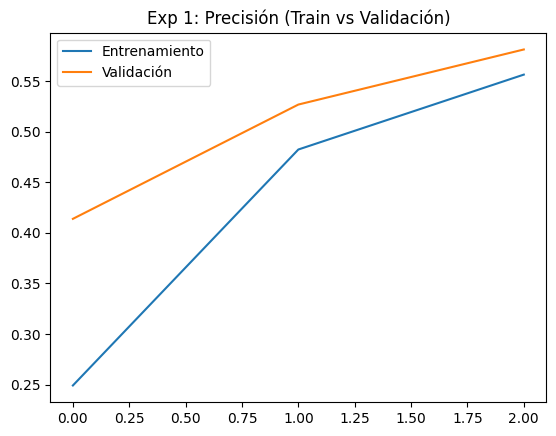


🔹 Ejecutando experimento 2: {'num_neuronas': 20, 'epochs': 5, 'learning_rate': 0.01, 'batch_size': 20}
Epoch 1/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4966 - loss: 1.9360 - val_accuracy: 0.7872 - val_loss: 1.0877
Epoch 2/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8142 - loss: 0.9555 - val_accuracy: 0.8535 - val_loss: 0.6949
Epoch 3/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8615 - loss: 0.6448 - val_accuracy: 0.8776 - val_loss: 0.5400
Epoch 4/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8791 - loss: 0.5215 - val_accuracy: 0.8883 - val_loss: 0.4606
Epoch 5/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8907 - loss: 0.4474 - val_accuracy: 0.8977 - val_loss: 0.4118


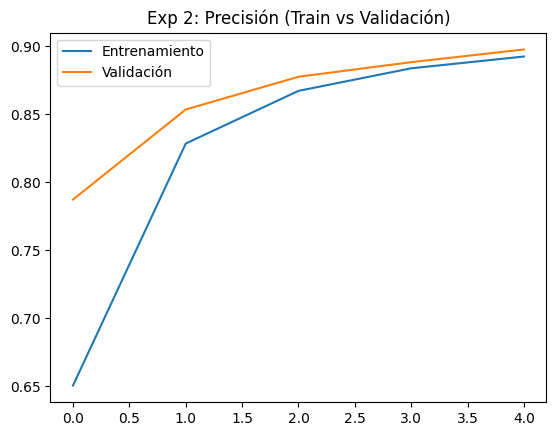


🔹 Ejecutando experimento 3: {'num_neuronas': 50, 'epochs': 20, 'learning_rate': 1.5, 'batch_size': 50}
Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7198 - loss: 0.8368 - val_accuracy: 0.9180 - val_loss: 0.2697
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9279 - loss: 0.2391 - val_accuracy: 0.9463 - val_loss: 0.1825
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9446 - loss: 0.1808 - val_accuracy: 0.9532 - val_loss: 0.1656
Epoch 4/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9532 - loss: 0.1575 - val_accuracy: 0.9484 - val_loss: 0.1775
Epoch 5/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9593 - loss: 0.1346 - val_accuracy: 0.9575 - val_loss: 0.1487
Epoch 6/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9631 - loss: 0.1230 - val_accuracy: 0.9557 - val_loss: 0.1508
Epoch 7/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9665 - loss: 0.1115 - val_accuracy: 0.9611 - val_loss: 0.1376


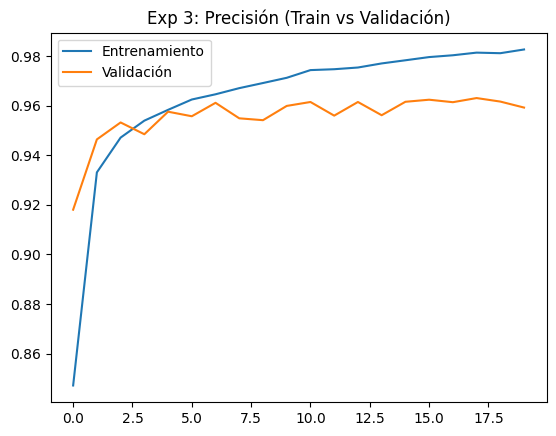

In [46]:
# 6️⃣ Entrenar los modelos y guardar resultados
resultados = []
for i, exp in enumerate(experimentos):
    print(f"\n🔹 Ejecutando experimento {i+1}: {exp}")
    model, history, test_acc = entrenar_modelo(**exp)

    # Guardar resultados
    resultados.append({
        "config": exp,
        "accuracy_test": test_acc,
        "history": history
    })

    # Graficar la precisión en entrenamiento y validación
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.legend()
    plt.title(f"Exp {i+1}: Precisión (Train vs Validación)")
    plt.show()

# Visualización

In [47]:
# from matplotlib import pyplot as plt
# plt.plot(history.history['accuracy'], label="accuracy")
# plt.plot(history.history['val_accuracy'], label="validation accuracy")

# plt.title("Entrenamiento MNIST")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend(loc="lower right")

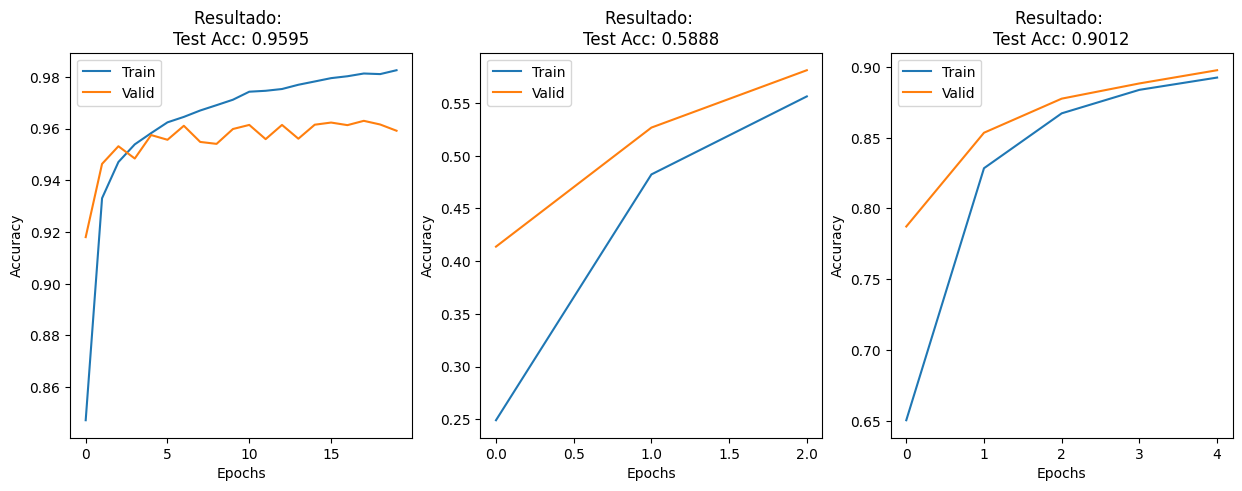

In [48]:
# Encontrar mejor, peor y término medio configuración
mejor = max(resultados, key=lambda x: x["accuracy_test"])
peor = min(resultados, key=lambda x: x["accuracy_test"])
medio = sorted(resultados, key=lambda x: x["accuracy_test"])[1]  # El del medio

# Graficar comparación de resultados
plt.figure(figsize=(15, 5))

for i, exp in enumerate([mejor, peor, medio]):
    plt.subplot(1, 3, i+1)
    plt.plot(exp["history"].history['accuracy'], label='Train')
    plt.plot(exp["history"].history['val_accuracy'], label='Valid')
    plt.title(f"Resultado: \nTest Acc: {exp['accuracy_test']:.4f}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

plt.show()

In [49]:
# Mostrar los valores en pantalla
print("\nResultados Finales")
print(f"Mejor configuración: {mejor['config']} → Precisión en test: {mejor['accuracy_test']:.4f}")
print(f"Peor configuración: {peor['config']} → Precisión en test: {peor['accuracy_test']:.4f}")
print(f"Término medio configuración: {medio['config']} → Precisión en test: {medio['accuracy_test']:.4f}")


Resultados Finales
Mejor configuración: {'num_neuronas': 50, 'epochs': 20, 'learning_rate': 1.5, 'batch_size': 50} → Precisión en test: 0.9595
Peor configuración: {'num_neuronas': 5, 'epochs': 3, 'learning_rate': 0.001, 'batch_size': 5} → Precisión en test: 0.5888
Término medio configuración: {'num_neuronas': 20, 'epochs': 5, 'learning_rate': 0.01, 'batch_size': 20} → Precisión en test: 0.9012


# Producción

In [50]:
# Entrenar un modelo y guardarlo en la variable model
model, history, test_acc = entrenar_modelo(num_neuronas=50, epochs=20, learning_rate=1.5, batch_size=50)

# Ahora `model` está definido y puedes hacer predicciones
predictions = np.round(model.predict(X_test),2)

# Mostrar la predicción de la primera imagen
print(f"Desired output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")


Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7222 - loss: 0.8330 - val_accuracy: 0.9168 - val_loss: 0.2742
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9279 - loss: 0.2360 - val_accuracy: 0.9325 - val_loss: 0.2199
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9420 - loss: 0.1905 - val_accuracy: 0.9498 - val_loss: 0.1702
Epoch 4/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9550 - loss: 0.1497 - val_accuracy: 0.9518 - val_loss: 0.1750
Epoch 5/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9572 - loss: 0.1374 - val_accuracy: 0.9595 - val_loss: 0.1394
Epoch 6/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9651 - loss: 0.1143 - val_accuracy: 0.9568 - val_loss: 0.1466
Epoch 7/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9686 - loss: 0.1041 - val_accuracy: 0.9583 - val_loss: 0.1427
Epoch 8/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9669 - loss: 0.1075 - val_accuracy: 0.

In [51]:
for i in range(100):
  if np.argmax(predictions[i]) == np.argmax(y_test[i]):
    print(predictions[i], "->", y_test[i])
  else:
    print(predictions[i], "->", y_test[i], "X")

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.   0.   0.   0.   0.   0.19 0.81 0.   0.   0.  ] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] X
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] -> [0. 1

In [52]:
from google.colab import files
# Guardamos el modelo
model.save("modelo_mnist.h5")
print("✅ Modelo guardado como 'modelo_mnist.h5'")
files.download("modelo_mnist.h5")

✅ Modelo guardado como 'modelo_mnist.h5'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
from tensorflow.keras.models import load_model

# 📌 Recompilar con categorical_crossentropy antes de guardarlo
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 📌 Guardar el modelo en formato HDF5
model.save("modelo_mnist.h5")

print("✅ Modelo guardado correctamente con categorical_crossentropy")
files.download("modelo_mnist.h5")


✅ Modelo guardado correctamente con categorical_crossentropy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>